In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

%matplotlib inline

# Load dataset

In [83]:
digits = load_digits()
x_origin = digits.data
y_origin = digits.target
num_classes = 10

print("x_origin.shape:", x_origin.shape)
print("y_origin.shape:", y_origin.shape)

x_origin.shape: (1797, 64)
y_origin.shape: (1797,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(x_origin, y_origin, test_size=0.2, shuffle=True, random_state=42)
print("X_train.shape:", X_train.shape) # (samples, features)
print("y_train.shape:", y_train.shape) # (samples,)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1437, 64)
y_train.shape: (1437,)
X_test.shape: (360, 64)
y_test.shape: (360,)


y_train[index]: 0


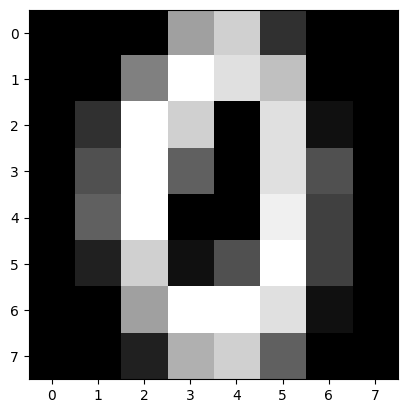

In [85]:
index = 2
print("y_train[index]:", y_train[index])
plt.imshow(X_train[index].reshape(8, 8), cmap='gray')
plt.show()

# Reshape the data

In [86]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, m_train)
y_test = y_test.reshape(1, m_test)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (64, 1437)
y_train.shape: (1, 1437)
X_test.shape: (64, 360)
y_test.shape: (1, 360)


The shape of the data (x) is (n, m) and the label (y)is (1, m), where n is the number of features and m is the number of samples.

In [87]:
def one_hot(y):
    m = y.shape[1]
    y_one_hot = np.zeros((num_classes, m))
    for i in range(m):
        y_one_hot[y[0][i], i] = 1
    return y_one_hot

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)

print("y_train_one_hot.shape:", y_train_one_hot.shape)
print("y_test_one_hot.shape:", y_test_one_hot.shape)

for i in range(10):
    print("y_train_one_hot[:,", i, "]:", y_train_one_hot[:, i], "(", y_train[:, i], ")")

y_train_one_hot.shape: (10, 1437)
y_test_one_hot.shape: (10, 360)
y_train_one_hot[:, 0 ]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] ( [6] )
y_train_one_hot[:, 1 ]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ( [0] )
y_train_one_hot[:, 2 ]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ( [0] )
y_train_one_hot[:, 3 ]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] ( [3] )
y_train_one_hot[:, 4 ]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ( [0] )
y_train_one_hot[:, 5 ]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] ( [5] )
y_train_one_hot[:, 6 ]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ( [0] )
y_train_one_hot[:, 7 ]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ( [0] )
y_train_one_hot[:, 8 ]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] ( [4] )
y_train_one_hot[:, 9 ]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] ( [1] )


# Prepare the functions

In [88]:
def softmax(z):
    z_exp = np.exp(z)
    return z_exp / np.sum(z_exp, axis=0, keepdims=True)

In [89]:
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[1]
    return (-1 / m) * np.sum(y_true * np.log(y_pred))

In [90]:
def activate(w, b, X):
    Z = np.dot(w.T, X) + b.T
    return softmax(Z)

In [91]:
def gradient(w, b, X, Y, print_cost=False):
    m = X.shape[1]
    A = activate(w, b, X)
    cost = cross_entropy_loss(A, Y)
    if print_cost:
        print("Cost function:", cost)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y, axis=1, keepdims=True).T
    return dw, db

In [92]:
def initialize_weight_bias(n):
    w = np.zeros((n, num_classes))
    b = np.zeros((1, num_classes))
    return w, b

In [93]:
def train(X, Y, iterations=1000, learning_rate=0.01):
    w, b = initialize_weight_bias(X.shape[0])
    for i in range(iterations):
        dw, db = gradient(w, b, X, Y, print_cost=(i % 100 == 0))
        w = w - learning_rate * dw
        b = b - learning_rate * db
    return w, b

In [94]:
def predict(w, b, X):
    return activate(w, b, X)

# Train

In [95]:
w, b = train(X_train, y_train_one_hot)
print("w.shape:", w.shape)
print("b.shape:", b.shape)

Cost function: 2.3025850929940455
Cost function: 0.17146853273112825
Cost function: 0.12412853072466074
Cost function: 0.1022488751849838
Cost function: 0.08859111404729746
Cost function: 0.07891657361484558
Cost function: 0.07157057027836246
Cost function: 0.06573681058215311
Cost function: 0.060954522472020364
Cost function: 0.05694036554506138
w.shape: (64, 10)
b.shape: (1, 10)


# Test

In [96]:
Y_train_pred_multiple = predict(w, b, X_train)
Y_test_pred_multiple = predict(w, b, X_test)

print("Y_train_pred.shape:", Y_train_pred_multiple.shape)
print("Y_test_pred.shape:", Y_test_pred_multiple.shape)

for i in range(num_classes):
    Y_train = y_train_one_hot[i]
    Y_test = y_test_one_hot[i]
    Y_train_pred = Y_train_pred_multiple[i]
    Y_test_pred = Y_test_pred_multiple[i]
    print("Class:", i)
    print("Train accuracy:", 1 - np.mean(np.abs(Y_train - Y_train_pred)))
    print("Test accuracy:", 1 - np.mean(np.abs(Y_test - Y_test_pred)))

Y_train_pred.shape: (10, 1437)
Y_test_pred.shape: (10, 360)
Class: 0
Train accuracy: 0.9978319127141045
Test accuracy: 0.9961507880283054
Class: 1
Train accuracy: 0.9848868611687671
Test accuracy: 0.9854868290141805
Class: 2
Train accuracy: 0.9959266813783749
Test accuracy: 0.9904412744991554
Class: 3
Train accuracy: 0.9906781156600158
Test accuracy: 0.9911127967976893
Class: 4
Train accuracy: 0.9938489378684695
Test accuracy: 0.9929147637983933
Class: 5
Train accuracy: 0.9928981876393045
Test accuracy: 0.9809316427094843
Class: 6
Train accuracy: 0.9955751637095441
Test accuracy: 0.992352018970955
Class: 7
Train accuracy: 0.9956236925866137
Test accuracy: 0.9940468312704313
Class: 8
Train accuracy: 0.9804972886175651
Test accuracy: 0.9830233255550862
Class: 9
Train accuracy: 0.9877049956982737
Test accuracy: 0.9807158857914428


test sample: 0
Prediction: [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9996 0.0000 0.0004 0.0000]
Actual: [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000] ( [6] )


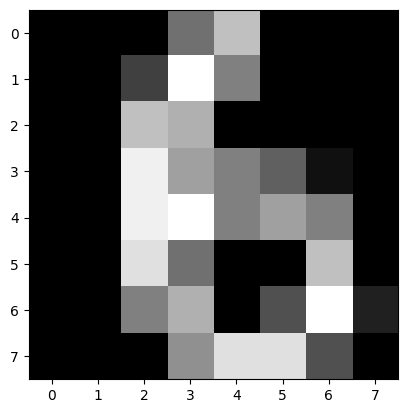

test sample: 1
Prediction: [0.0003 0.0000 0.0000 0.0004 0.0002 0.0469 0.0000 0.0001 0.0001 0.9520]
Actual: [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000] ( [9] )


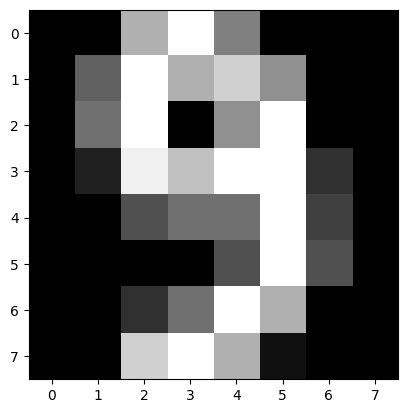

test sample: 2
Prediction: [0.0000 0.0000 0.0000 0.9996 0.0000 0.0000 0.0000 0.0000 0.0002 0.0002]
Actual: [0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000] ( [3] )


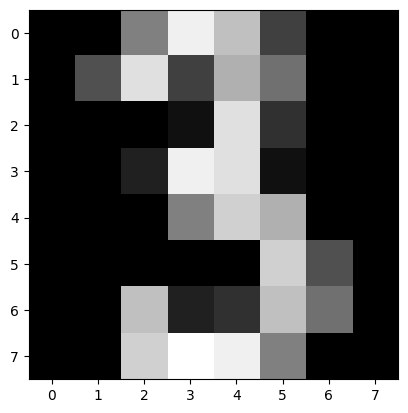

test sample: 3
Prediction: [0.0030 0.0024 0.0001 0.0001 0.0008 0.0150 0.0000 0.9357 0.0002 0.0428]
Actual: [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000] ( [7] )


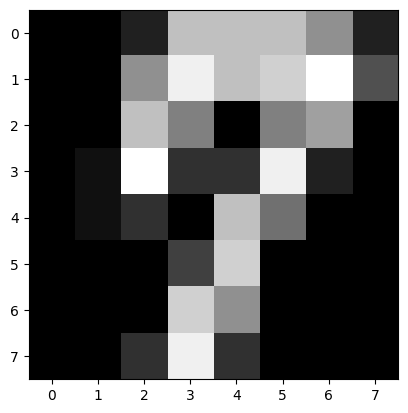

test sample: 4
Prediction: [0.0000 0.0002 0.9010 0.0801 0.0000 0.0002 0.0005 0.0000 0.0177 0.0002]
Actual: [0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000] ( [2] )


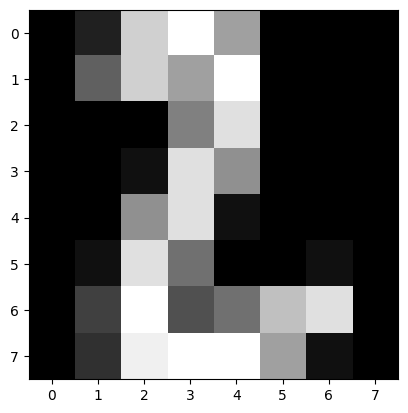

test sample: 5
Prediction: [0.0000 0.6133 0.3253 0.0000 0.0005 0.0246 0.0034 0.0000 0.0327 0.0002]
Actual: [0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000] ( [1] )


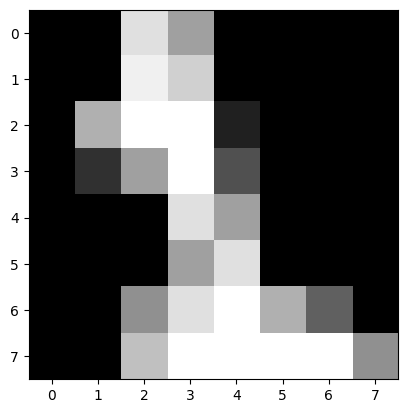

test sample: 6
Prediction: [0.0000 0.0000 0.0000 0.0006 0.0000 0.9988 0.0000 0.0000 0.0003 0.0001]
Actual: [0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000] ( [5] )


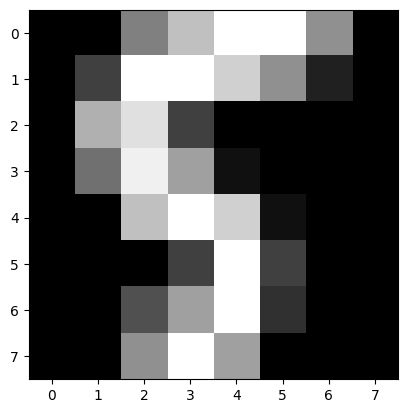

test sample: 7
Prediction: [0.0001 0.0004 0.9659 0.0331 0.0000 0.0000 0.0000 0.0002 0.0001 0.0003]
Actual: [0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000] ( [2] )


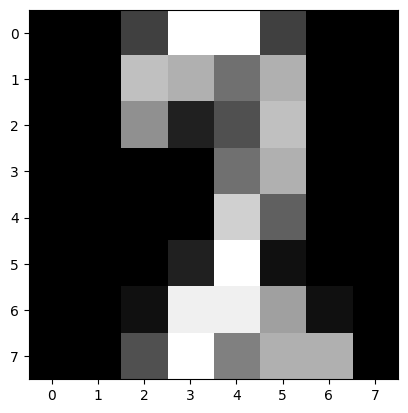

test sample: 8
Prediction: [0.0000 0.0000 0.0000 0.0001 0.0001 0.9995 0.0000 0.0002 0.0000 0.0000]
Actual: [0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000] ( [5] )


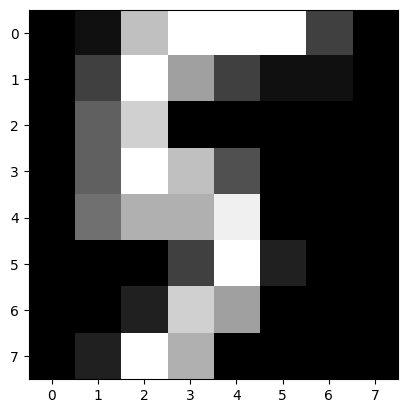

test sample: 9
Prediction: [0.0000 0.0000 0.9332 0.0614 0.0000 0.0000 0.0000 0.0053 0.0000 0.0000]
Actual: [0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000] ( [2] )


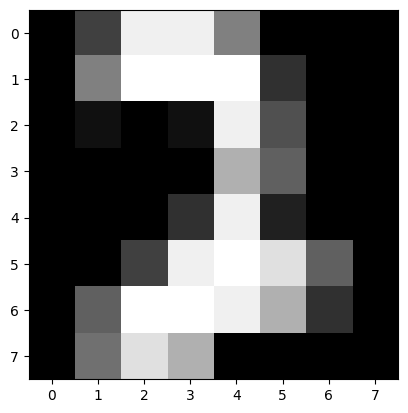

In [103]:
np.set_printoptions(precision=4, suppress=True, floatmode='fixed')
for i in range(10):
    prediction = Y_test_pred_multiple[:, i]
    actual = y_test_one_hot[:, i]
    print("test sample:", i)
    print("Prediction:", prediction)
    print("Actual:", actual, "(", y_test[:, i], ")")
    plt.imshow(X_test[:, i].reshape(8, 8), cmap='gray')
    plt.show()